# 548 22sp exam1 due 11:59p Fri Apr 29 

***You are welcome (and encouraged) to:***
- use analytical and numerical computational tools -- specify the tool(s) in sourcecode and/or text;
- reuse example sourcecode and other materials provided in this course;
- consult textbooks, websites, and other publicly-available materials -- include full citation(s) with the URL and/or [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier).

***You are not permitted to discuss the exam problems or share any part of your solutions with anyone other than the instructional staff (Professor and/or TA[s]) for this course.***
- By submitting your exam solution on Canvas, you are affirming your understanding of and adherence to these restrictions.
- We will answer questions during the class Zoom meetings Tue and Thu of the exam week.
- We will also answer questions posted to the Canvas Discussion board until 5p Fri of the exam week.

***The exam deadline is midnight (11:59p) Fri on Canvas.***
- Final submissions received before this deadline will receive +2 bonus points (equal to one subproblem).
- Everyone automatically receives a deadline extension to midnight (11:59p) Sunday following the deadline. ***No further deadline extensions will be granted except in exceptional circumstances -- please plan accordingly, but do reach out if you need help.***

13.2 <= scores <= 22.0
median score = 20.5


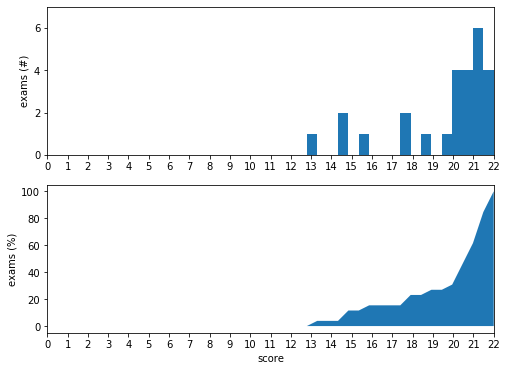

In [61]:
import numpy as np
import pylab as plt

scores = np.array([13.25, 14.5, 14.75, 15.5, 17.5, 17.75, 18.5, 19.5, 20.0, 20.0, 20.0, 20.25, 20.5, 20.5, 20.5, 20.5, 21.0, 21.0, 21.0, 21.0, 21.0, 21.25, 21.5, 21.5, 22.0, 22.0]
)

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,22)
dxlim = xlim[1] - xlim[0]

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],2*dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N+1)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,N,(N+2)//2))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# problem 1

Consider the problem of minimizing $c:\mathbb{R}^m\rightarrow\mathbb{R}$, which is two-times continuously-differentiable.  In particular, we seek to find $u^*\in\mathbb{R}^m$ such that $D c(u^*) = 0$ and $D^2 c(u^*) > 0$.

## subproblem (a) 
The ***steepest descent*** difference equation (DE) for approximating $u^*$ is $u^+ = u - \alpha\, D c(u)^\top$, where $\alpha > 0$ is a *step size* parameter.

Linearize the steepest descent DE about $u^*$ and show that the linearized DE is unstable when $\alpha > 0$ is too large.  In other words:  (i) determine the matrix $A_\alpha$ such that $\delta u^+ \approx A_\alpha \, \delta u$ implies $u^+ \approx u^* + \delta u^+$ when $u = u^* + \delta u$ and $\delta u$ is small; and (ii) show that $A_\alpha$ is unstable for $\alpha > 0$ sufficiently large.  

## solution

Differentiating the DE $u^+ = F(u) = u - \alpha\, Dc(u)^\top$ and evaluating at $u^*$ yields $DF(u^*) = I - \alpha\, D^2 c(u^*) = A_\alpha$ for part (i).  

For part (ii), note that the eigenvalues of $A_\alpha$ are related to those of $H = D^2 c(u^*)$ since 
$$ H v = \lambda v \implies A_\alpha v = (1 - \alpha\lambda) v. $$
Since we are given that $H = H^\top > 0$ we know that $H$ is invertible so none of its eigenvalues are zero (in fact, they are all positive numbers).
We conclude that there exists $\alpha > 0$ sufficiently large so that $| 1 + \alpha\lambda | > 1$ for any eigenvalue $\lambda$ of $H$, so the linearized DE is unstable for all $\alpha > 0$ sufficiently large.

**notes:**
- 0.5 points for linearization
- 0.5 points for stability analysis
- one common mistake:  conflating $H$ or $A_\alpha$ (matrices) with their eigenvalues (scalars) -- this is *almost* but *not quite* OK, as $A_\alpha = A_\alpha^\top$ implies $A_\alpha$ is diagonalizable

## subproblem (b) 
The ***Newton-Raphson*** DE for approximating $u^*$ is $u^+ = u - \left[ D^2 c(u^*) \right]^{-1} Dc(u)^\top$.

Linearize the Newton-Raphson DE about $u^*$ and assess stability of the linearized DE.

***Hint:*** you should find that the linearized DE in (b) is ***much*** more stable than the linearized DE in (a).

## solution

Differentiating the DE $u^+ = F(u) = u - \left[ D^2 c(u^*) \right]^{-1} Dc(u)^\top$ and evaluating at $u^*$ yields $DF(u^*) = I - I = 0 = A$.  Since all eigenvalues of $A$ are zero, they have magnitude smaller than $1$, so the linearized DE is stable.

In fact the linearized DE in this subproblem is ***much*** more stable than the one from the previous subproblem because convergence occurs in *finite time* (rather than "merely" at an exponential rate) -- in terms of the original (nonlinear) DE, this implies convergence is ***super***-exponential, that is, the convergence rate is faster than any exponential.

**notes:**
- 0.5 points for linearization
- 0.5 points for stability analysis

# problem 2

Consider the (CT-LTI) model
$$\dot{x} = Ax$$
and the (DT-LTI) model
$$\bar{x}^+ = \bar{A}\bar{x}$$
that is obtained by discretizing (CT-LTI) using *Forward Euler* or *Exact* discretization with step size $\Delta > 0$:
* Forward Euler:  $\bar{x}^+ = \bar{x} + \Delta\, A \bar{x}$;
* Exact:  $\bar{x}^+ = e^{\Delta\, A} \bar{x}$;

***Hint:*** you should be able to determine how eigenvalues of the (DT-LTI) system relate to eigenvalues of the (CT-LTI) system.

## subproblem (a) 

If (CT-LTI) is exponentially stable, is the (DT-LTI) system obtained from Forward Euler discretization exponentially stable for all $\Delta > 0$?

## solution

The eigenvalues of $\bar{A} = (I + \Delta\, A)$ are related to the eigenvalues of $A$:
$$ A v = \lambda v \implies \bar{A} v = (I + \Delta\, A) v = (1 + \Delta \lambda) v. $$

If (CT-LTI) is exponentially stable, then the eigenvalues of $A$ have negative real part:  
$$ A v = \lambda v \implies \operatorname{Re}\lambda < 0. $$

Therefore for $\Delta > 0$ sufficiently large we have that $|1 + \Delta \lambda| > 1$, in which case (DT-LTI) is unstable.

**notes:**
- 0.5 points for determining eigenvalues of $\bar{A}$
- 0.5 points for stability analysis
- one common mistake:  assuming eigenvalues of $A$ are purely real

## subproblem (b) 
Determine stability of the (DT-LTI) system obtained from Exact discretization when the (CT-LTI) system is (i) stable and (ii) unstable.

## solution

The eigenvalues of $\bar{A} = e^{\Delta\, A}$ are related to the eigenvalues of $A$:
$$ A v = \lambda v \implies \bar{A} v = e^{\Delta\, A} v = e^{\Delta\,\lambda} v; $$
this can be shown using the power series definition of the matrix exponential.

Since the scalar exponential maps the left-half complex plane to the interior of the unit circle and the right-half complex plane to the exterior of the unit circle, we conclude that the (DT-LTI) system is stable if and only if the (CT-LTI) system is stable.

**notes:**
- 0.5 points for determining eigenvalues of $\bar{A}$
- 0.5 points for stability analysis

# problem 3

(a) Given $A\in\mathbb{R}^{m\times n}$, $B\in\mathbb{R}^{n\times m}$ such that $(I - A\, B)$ and $(I - B\, A)$ are invertible, show that $A (I - B\, A)^{-1} = (I - A\, B)^{-1} A$.

***Hint:*** it may help to consider the following MIMO system block diagram:

![](https://raw.githubusercontent.com/sburden/548-22sp/master/548_22sp_exam1_block-diagram.png)

## solution

Following the hint, we will make use of the block diagram.  A happy thought leads us to derive $T_{yu}$ two ways:  directly (write $y$ in terms of $u$) and indirectly ($T_{yu} = T_{yv}\, T_{vu}$).

First, we solve $y = G_1\, (u + G_2\, y)$ to obtain $y = (I - G_1\, G_2)^{-1} G_1\, u = T_{yu}\, u$.

Second, we solve $v = u + G_2\, G_1\, v$ to obtain $v = (I - G_2\, G_1)^{-1} u = T_{vu}\, u$ and hence $T_{yu} = T_{yv}\, T_{vu} = G_1\, (I - G_2\, G_1)^{-1}$.

The two expressions for $T_{yu}$ must be equal since they both specify the same linear operator, so we conclude $A\, (I - B\, A)^{-1} = (I - A\, B)^{-1} A$.

Actually, this identity can be derived purely algebraically by noting that $A - ABA = A(I - BA) = (I - AB)A$ and multiplying this equation by $(I-AB)^{-1}$ on the left (i.e. "pre"-multiplying) and by $(I-BA)^{-1}$ on the right.

(b) Derive the transfer functions $T_{vu}$ and $T_{zu}$ and show that there is a tradeoff between the two of them.

***Hint:*** it may help to use the formula you verified in (a).

## solution

We already derived $T_{vu} = (I - G_2\, G_1)^{-1}$ in (a).

We solve $z = G_2\, G_1\, (u + z)$ to obtain $z = (I - G_2\, G_1)^{-1} G_2\, G_1\, u = T_{zu} u$.

Observing that $T_{vu} - T_{zu} = (I - G_2\, G_1)^{-1}(I - G_2\, G_1) = I$, we have identified a tradeoff between these two transfer functions.

**notes:**
- 0.5 points for MIMO analysis
- 0.25 points each for $T_{vu}$ and $T_{zu}$
- one common mistake:  assuming $A$ or $B$ are invertible -- they are not even square

# problem 4

Consider the control system below with input disturbance $v$ and output disturbance $w$ -- assume all signals are scalar-valued, so all transformations are single-input/single-output (SISO).

![](http://faculty.washington.edu/sburden/447/447-final-exam-block-diagram.png)

You just started a new job as a ***Senior Control System Engineer*** at a startup company that is designing a quadrotor drone for power line inspection.

## subproblem (a)

At this morning's all-hands meeting, the mechatronics team announces that electromagnetic interference introduces significant input disturbance $v$ and output disturbance $w$ at $60\text{Hz}$, so your boss tasks you with designing controller $C$ to attenuate 90% of the effect of these disturbances on input $u$ and output $y$, i.e. with $T_{uv}$ denoting the transfer function from $v$ to $u$ and $T_{yw}$ denoting the transfer function from $w$ to $y$,

$$|T_{uv}(j\, 60\text{Hz})| \le 0.1,\ |T_{yw}(j\, 60\text{Hz})| \le 0.1. $$

Determine whether it is possible to satisfy this specification, and explain your conclusion to your team.

## solution

It is not possible to satisfy this specification because of the tradeoff $T_{yw} - T_{uv} = 1$ -- at any particular frequency $\omega$, we have $T_{yw}(j\omega) - T_{uv}(j\omega) = 1$, so applying the triangle inequality yields $1 = |T_{yw}(j\omega) - T_{uv}(j\omega)| \leq |T_{yw}(j\omega)| + |T_{uv}(j\omega) |$, so it is not possible for the rightmost expression to be $\leq 0.2$ at $\omega = 60$Hz.

**notes:**
- 0.5 points for recognizing tradeoff
- 0.5 points for deriving algebraic contradiction

## subproblem (b)

During this afternoon's stand-up meeting, the aerodynamics team points out that turbulent wind conditions cause broad-band input disturbance $v$, so your boss tasks you with changing the controller design, from $C$ to $\widetilde{C}$, to decrease the impact of these disturbances on the input $u$ by 25% at all frequencies, i.e. with $T_{uv}$ denoting the transfer function from $v$ to $u$ obtained with controller $C$ and $\widetilde{T}_{uv}$ denoting the transfer function obtained with controller $\widetilde{C}$,

$$ \forall \omega \geq 0 : |\widetilde{T}_{uv}(j\,\omega)| \leq 0.75 |T_{uv}(j\,\omega)|. $$

Determine whether it is possible to satisfy this specification, and explain your conclusion to your team.

***notes:***
- 1 point for recognizing fundamental limit

## solution

It is not possible to satisfy this specification because of the Bode integral formula, which tells us that the integral $\int_0^\infty\log|S(j\omega)|d\omega$ is conserved regardless of the choice of controller.

For more details, refer to Theorems 1 and 2 in the following paper:
* Freudenberg, J., and D. Looze. 1985. “Right Half Plane Poles and Zeros and Design Tradeoffs in Feedback Systems.” IEEE Transactions on Automatic Control 30 (6): 555–65.

# problem 5

Consider minimization of the infinite-horizon quadratic cost

$$
\min \int_0^\infty x^\top Q x + u^\top R u,\
Q = q\, \left[ \begin{array}{c} 1 \\ 1 \end{array} \right] \left[ \begin{array}{c} 1 & 1 \end{array} \right]
,\ 
q > 0
,\
R = 1
$$

subject to the linear process model

$$
\dot{x}
=
\left[ \begin{array}{c} 1 & 1 \\ 0 & 1 \end{array} \right]
x
+
\left[ \begin{array}{c} 0 \\ 1 \end{array} \right]
u.
$$

## subproblem (a) 
Implement an algorithm that determines the matrix $K_q$ such that $u = -K_q x$ minimizes the quadratic cost for a given $q > 0$; provide (i) your implementation and (ii) the value of $K_q$ when $q = 1$.

In other words:

For part (i), fill in the body of the following function:

In [1]:
def K(q):
    """
    input:
        q - scalar - cost weight
        
    output:
        K_q - 1 x 2 - state feedback matrix
    """
    # ... -- compute K_q for the given A, B, Q, R matrices
    return K_q

For part (ii), evaluate $K(1)$.

## solution



We will compare three different solutions to sanity-check the answer(s):
1. discrete-time finite-horizon;
2. continuous-time finite-horizon;
3. continuous-time infinite-horizon.

In [45]:
import numpy as np
import scipy as sp
from scipy import linalg

# continuous-time LQR
T = 100 # time horizon
A = np.array([[1,1],[0,1]])
B = np.array([[0],[1]])
Q = np.array([[1],[1]]) @ np.array([[1,1]])
R = np.array([[1]])

# discrete-time LQR
dt = 1e-3 # timestep
A_ = np.eye(2) + dt*A
B_ = dt*B
Q_ = dt*Q
R_ = dt*R

def K(q):
    """
    input:
        q - scalar - cost weight
        
    output:
        K_q - 1 x 2 - state feedback matrix
    """
    # 1. discrete-time LQR DE
    P_ = np.zeros((2,2))
    for t in np.arange(0,T,dt):
        K_ = np.linalg.inv(B_.T @ P_ @ B_ + R_) @ B_.T @ P_ @ A_
        P_ = (A_ - B_ @ K_).T @ P_ @ (A_ - B_ @ K_) + K_.T @ R_ @ K_ + Q_*q
    # 2. continuous-time LQR DE
    P = np.zeros((2,2))
    for t in np.arange(0,T,dt):
        P = P + dt*(A.T @ P + P @ A - P @ B @ np.linalg.inv(R) @ B.T @ P + Q*q )
    K = np.linalg.inv(R) @ B.T @ P
    # 3. continuous-time infinite-horizon LQR
    _P = sp.linalg.solve_continuous_are(A,B,Q*q,R)
    _K = np.linalg.inv(R) @ B.T @ _P
    #return P_,P,_P
    return K_,K,_K

The three solutions agree to two decimal places, with the two continuous-time solutions agreeing to more than 7 decimal places:

In [46]:
q = 1
Kq_,Kq,_Kq = K(q)
print(Kq_)
print(Kq)
print(_Kq)

[[4.23111543 4.23323005]]
[[4.23606798 4.23606798]]
[[4.23606798 4.23606798]]


It turns out that the continuous-time solutions are more accurate, as the analytical solution is $K_q = (2 + \sqrt{4 + q})\left[ \begin{array}{cc} 1 & 1 \end{array} \right]$:

In [47]:
print((2 + np.sqrt(4 + q))*np.array([[1,1]]))

[[4.23606798 4.23606798]]


Of course, we could also use the `python-control` toolbox's `lqr` function:

In [48]:
np.allclose((2 + np.sqrt(4 + q))*np.array([[1,1]]),ctrl.lqr(A,B,Q*q,R)[0])

True

For more information about this particular problem, refer to the following paper:
* Doyle, John C. 1978. “Guaranteed Margins for LQG Regulators.” IEEE Transactions on Automatic Control 23 (4): 756–57.


**notes:**
- 0.5 points for implementation
- 0.5 points for correct `K(1)`

## subproblem (b) 
Suppose only the first component of state is observed and the controller from (a) is implemented using the state of an observer with gain matrix $L_q = K_q^\top$.  Plot the gain margin of the closed-loop system as a function of $q$ over the range $q\in(10^{-3},10^{+3})$.

## solution

With output $y = x_1 = \left[ \begin{array}{cc} 1 & 0 \end{array} \right] x = C\, x + D\, u$, the process has state-space representation

$$ \dot{x} = A x + B u,\ y = C x + D u, $$

so the process transfer function is $P(s) = C (sI - A)^{-1} B + D$.

The observer-based controller has state-space representation

$$ \dot{\hat{x}} = A \hat{x} + B u - L_q (\hat{y} - y),\ \hat{y} = C \hat{x} + D u,\ u = - K_q \hat{x}. $$

Noting that $y$ is the controller's *input* and $u$ is the controller's *output*, some substition yields the state-space representation for the controller

$$ \dot{\hat{x}} = (A - L_q\, C - B\, K_q + L_q\, D\, K_q) \hat{x} + L_q y = \hat{A}\hat{x} + \hat{B}y,\ u = - K_q \hat{x} = \hat{C}\hat{x} + \hat{D}y, $$

so the controller transfer function is $K(s) = \hat{C} (sI - \hat{A})^{-1} \hat{B} + \hat{D} = -K_q (sI - (A - L_q\, C - B\, K_q + L_q\, D\, K_q))^{-1} L_q$.

To compute the gain margin, we instantiate process $P$ and controller $K$ and connect them in series to obtain the (open-)loop transfer function $L$.

**notes:**
- 0.5 points for implementing observer-based controller
- 0.5 points for plotting gain margin of process+controller
- one common mistake:  instantiating the state-space system whose state consists of (i) observer state $\hat{x}$ and (ii) estimation error $e = x - \hat{x}$ with the incorrect "$B$" or "$C$" matrices -- this led to gain margin increasing as $q$ increases rather than decreasing as in the plot below

In [49]:
C = np.array([[1,0]])
D = np.array([[0]])

Text(0, 0.5, 'gain margin')

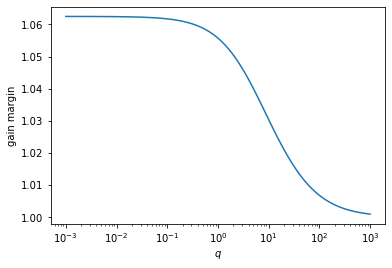

In [55]:
#1. using the python-control toolbox
import control as ctrl

P = ctrl.ss(A,B,C,D)

q_ = np.logspace(-3,+3,100)

g = []
for q in q_:
    K_q = np.linalg.inv(R) @ B.T @ sp.linalg.solve_continuous_are(A,B,Q*q,R)
    L_q = K_q.T
    K = ctrl.ss(A - L_q @ C - B @ K_q + L_q @ D @ K_q, L_q, K_q, D)

    L = ctrl.series(P,K)

    g.append(ctrl.margin(L)[0])
    #g.append(ctrl.stability_margins(L)[0])
g = np.asarray(g)

import pylab as plt
plt.semilogx(q_,g);
#plt.semilogx(q_,20*np.log10(g)); # <-- convert to dB
plt.xlabel(r'$q$')
plt.ylabel('gain margin')